In [4]:
import scipy
import phase_portr as pp
import math

import ipywidgets as wd
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt
import sympy as symp
%matplotlib inline


In [5]:
#Define 
x,y, t=symp.symbols('x y t', real=True)



J = symp.Function('J')(x,y)

## Change here for new problem

In [6]:
f=x**2-y**2
g=x*y-1


In [7]:

def rhs(xy,t):
    xv,yv=xy
    rhs_symp=symp.lambdify((x,y),[f,g])
    return np.array(rhs_symp(xv,yv))


In [8]:

print('f=',f)
print('g=',g)

### Isoclines

xiso=symp.solve(f)
yiso=symp.solve(g,y)

print('f = 0 when', xiso)
print('g = 0 when y=', yiso)

### Equilibrium points
eqpnts=symp.solve([f,g],(x,y),dict=True)
print('Equilibrium points. ', eqpnts)

### Jacobian
J=symp.Matrix([f,g]).jacobian([x,y])
print('Jacobian J=',J)

J_num=symp.lambdify((x,y),J,modules='numpy') # the numerical Jacobian


f= x**2 - y**2
g= x*y - 1
f = 0 when [{x: -y}, {x: y}]
g = 0 when y= [1/x]
Equilibrium points.  [{x: -1, y: -1}, {x: 1, y: 1}]
Jacobian J= Matrix([[2*x, -2*y], [y, x]])


In [54]:
for ii in np.arange(len(eqpnts)):
    print('Eq. pnt ', ii ,' at ',eqpnts[ii])
    eigen=J.subs(eqpnts[0]).eigenvals()
    print('Eigenvalues ', eigen)
    eigen=list(eigen.items())
    print(len(eigen))
    for jj in np.arange(len(eigen)):
        print(eigen[jj][0])
    print()

Eq. pnt  0  at  {x: -1, y: -1}
Eigenvalues  {-3/2 - sqrt(7)*I/2: 1, -3/2 + sqrt(7)*I/2: 1}
2
-3/2 - sqrt(7)*I/2
-3/2 + sqrt(7)*I/2

Eq. pnt  1  at  {x: 1, y: 1}
Eigenvalues  {-3/2 - sqrt(7)*I/2: 1, -3/2 + sqrt(7)*I/2: 1}
2
-3/2 - sqrt(7)*I/2
-3/2 + sqrt(7)*I/2



In [31]:
TMP=J.subs(eqpnts[0]).eigenvals()
type(TMP.keys())

dict_keys

In [9]:



#for ii in np.arange(len(eqpnts)):

for ii in np.arange(len(eqpnts)):
#    print(eqpnts[ii], 'eigenvals:', J.subs({x:eqpnts[ii][0],y:eqpnts[ii][1]}).eigenvals())
    print(eqpnts[ii], 'eigenvals:', J.subs(eqpnts[ii]).eigenvals().keys())


{x: -1, y: -1} eigenvals: dict_keys([-3/2 - sqrt(7)*I/2, -3/2 + sqrt(7)*I/2])
{x: 1, y: 1} eigenvals: dict_keys([3/2 - sqrt(7)*I/2, 3/2 + sqrt(7)*I/2])


In [10]:
J_num=symp.lambdify((x,y),J,modules='numpy')
tmp=LA.eig(J_num(0,0))

In [11]:
## Prepare the plot
u,v = tmp
v[:,1]

array([0., 1.])

(-4.0, 4.0)

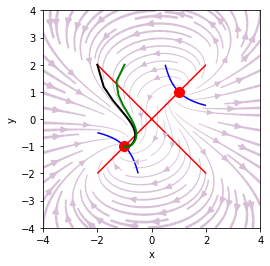

In [12]:

# Set up the figure
fig, ax = plt.subplots(1, 1)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_aspect('equal')

# Build the plot
a_range = [-4, 4]
b_range = [-4, 4]
ax = pp.plot_flow_field(ax, rhs, a_range, b_range,n_grid=100)
ax = pp.plot_nullcl(ax, rhs, [-2, 2], [-2, 2], args=(), n_grid=100)
for ii in np.arange(len(eqpnts)):   
    try:
        ax = pp.plot_fixed_points(ax, [eqpnts[ii][x],eqpnts[ii][y]] ,color='red')
    except:
        print('except, possibly complext root') 
    

            

ax = pp.plot_traj(ax, rhs, np.array([-1, -1]), np.linspace(0, -10, 50), color=np.array([0.5, 0.5, 0.5]), lw=2)
ax = pp.plot_traj(ax, rhs, np.array([-1, -1]), np.linspace(0, 10, 50), color='red', lw=2)

ax = pp.plot_traj(ax, rhs, np.array([-2, 2]), np.linspace(0, 10, 50), color='black', lw=2)


ax = pp.plot_traj(ax, rhs, np.array([-1, 2]), np.linspace(0, 10, 50), color='green', lw=2)

plt.xlim(a_range)
plt.ylim(b_range)